<a href="https://colab.research.google.com/github/mrezaim/Expanse/blob/main/EXPANSE_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the implimentation of verifying the effectiveness of EXPANSE on Fashion MNIST.

The details of idea is available in the paper of: Iman, Mohammadreza, Khaled Rasheed, and Hamid Reza Arabnia. “EXPANSE, A Continual Deep Learning System; Research Proposal”, International Conference on Computational Science and Computational Intelligence, IEEE CPS/IEEE Xplore


Some parts of the following codes are imported (with and without adjustments) from "https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/"


---



Fashion MNIST datasets:
@article{DBLP:journals/corr/abs-1708-07747,
  author    = {Han Xiao and
               Kashif Rasul and
               Roland Vollgraf},
  title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
               Algorithms},
  journal   = {CoRR},
  volume    = {abs/1708.07747},
  year      = {2017},
  url       = {http://arxiv.org/abs/1708.07747},
  archivePrefix = {arXiv},
  eprint    = {1708.07747},
  timestamp = {Mon, 13 Aug 2018 16:47:27 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/abs-1708-07747},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}

First we import all the necessary libraries:

---



In [1]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import gdown
import cv2
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from numpy import mean
from numpy import std
# to make the results of different run similar:
from numpy.random import seed
seed(1)
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

Download and import Train and Test data from MNIST:

---



In [69]:
(trainX, trainy), (testX, testy) = tf.keras.datasets.fashion_mnist.load_data()
assert trainX.shape == (60000, 28, 28)
assert testX.shape == (10000, 28, 28)
assert trainy.shape == (60000,)
assert testy.shape == (10000,)

Visualize 9 samples of data from MNIST Train dataset:

---



Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

6 3 1 5 4 6 7 5 5 

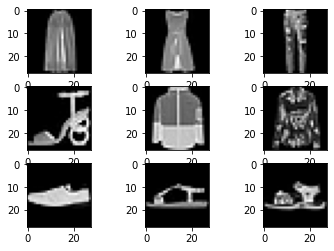

In [3]:
j=0
for i in range(113,122):
  plt.subplot(330 + 1 + j)
  j += 1
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  print (trainy[i], end =" ")
plt.show()

Manually selectng exemplary data:

10014 

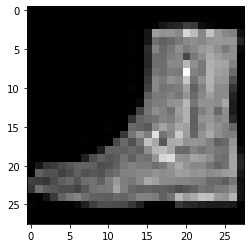

10017 

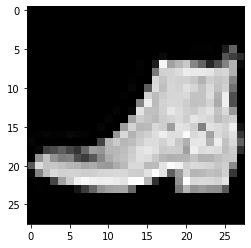

10022 

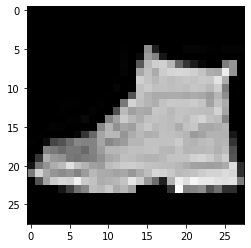

10036 

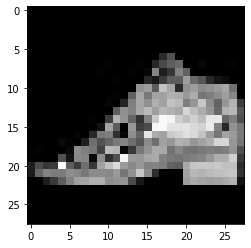

10039 

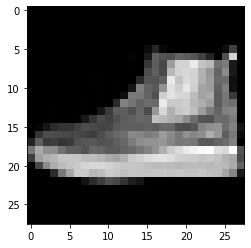

10040 

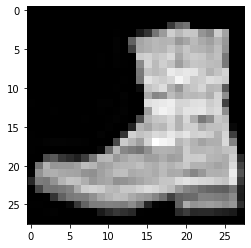

10054 

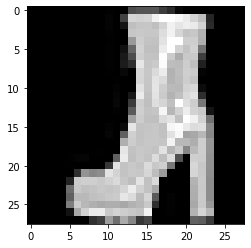

10056 

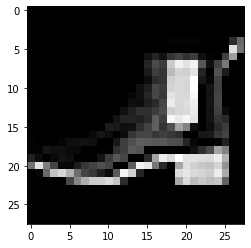

10059 

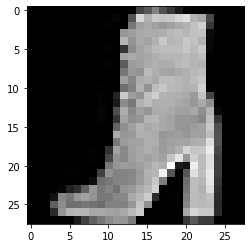

10070 

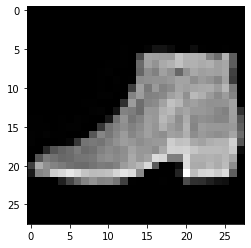

10072 

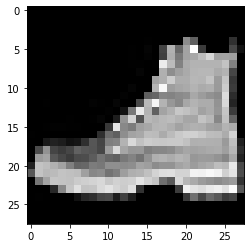

10087 

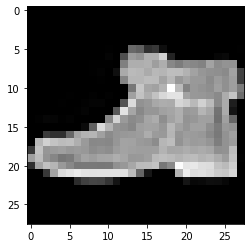

10107 

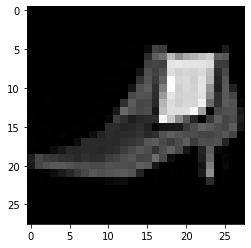

10116 

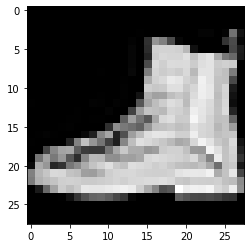

10119 

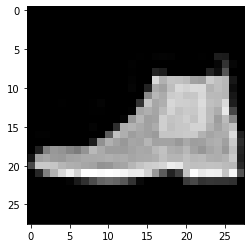

10120 

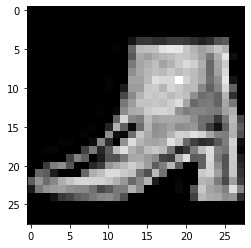

10121 

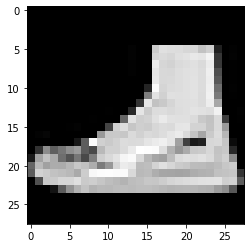

10130 

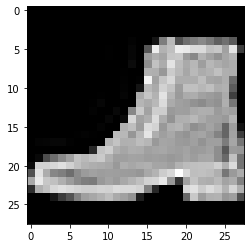

10135 

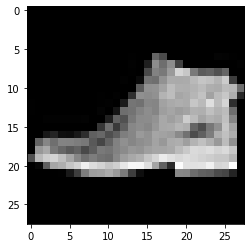

10144 

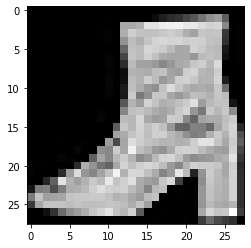

10160 

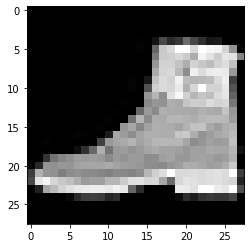

10171 

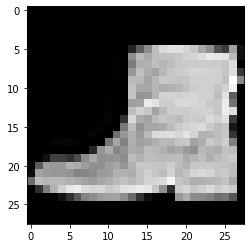

10173 

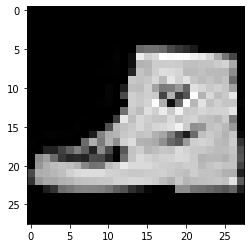

10180 

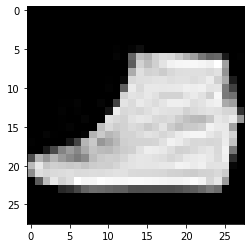

10182 

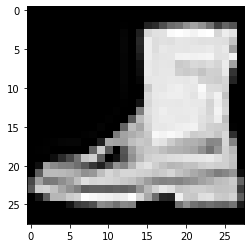

10183 

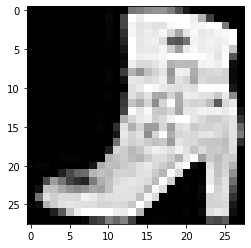

10189 

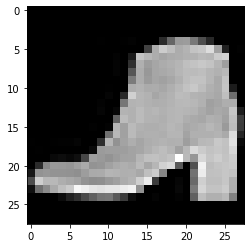

10190 

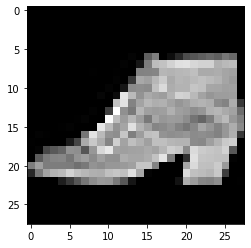

10203 

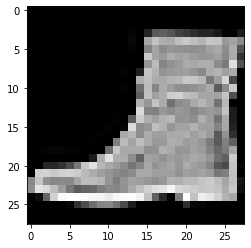

10212 

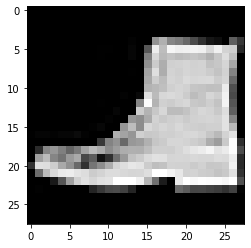

10235 

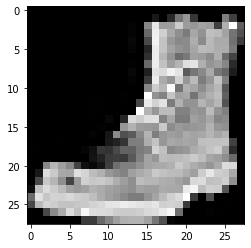

10237 

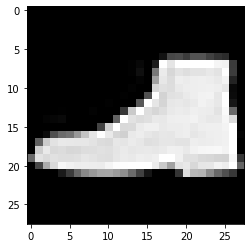

10254 

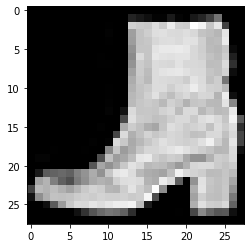

10255 

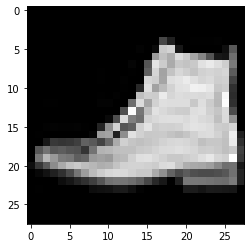

10256 

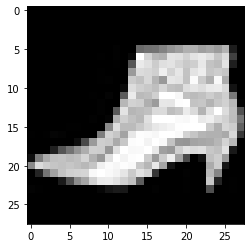

10263 

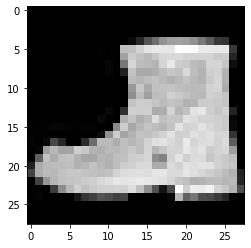

10268 

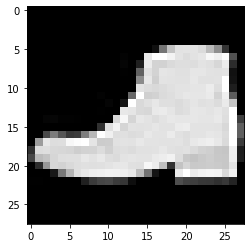

10285 

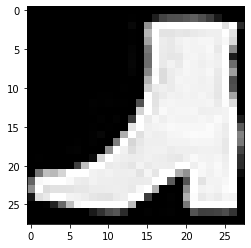

10308 

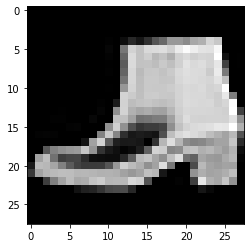

10313 

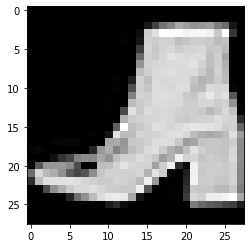

10316 

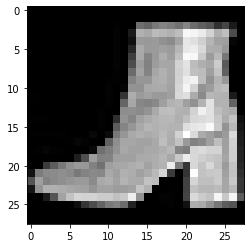

10319 

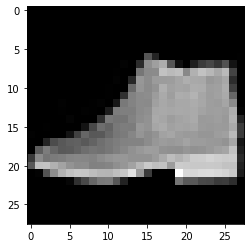

10321 

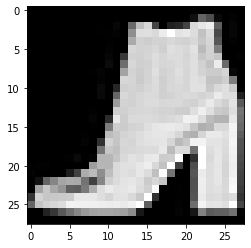

10327 

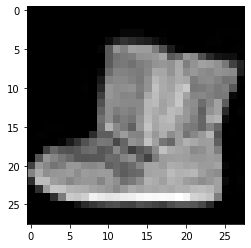

10328 

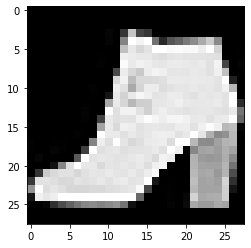

10331 

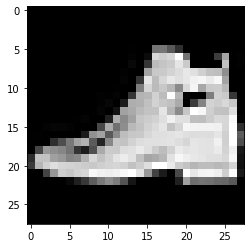

10336 

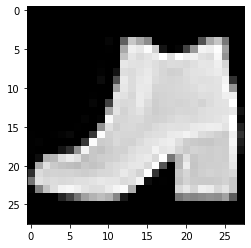

10344 

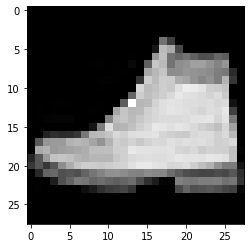

10345 

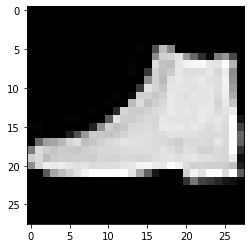

10352 

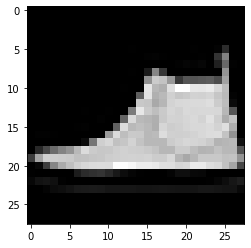

10365 

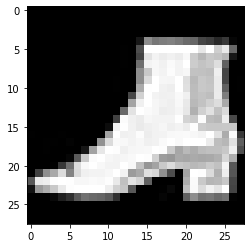

10392 

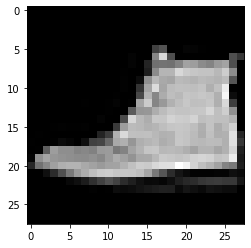

10394 

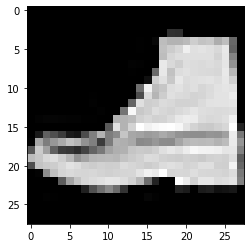

10398 

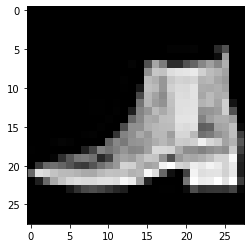

10400 

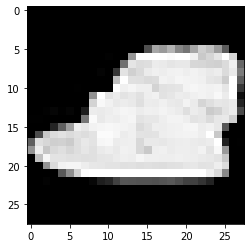

10428 

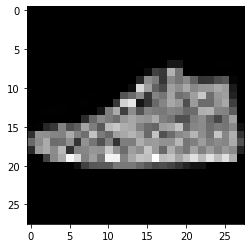

10444 

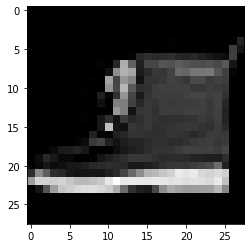

10453 

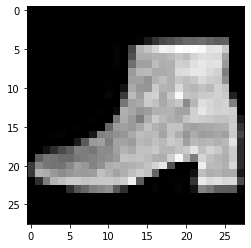

10470 

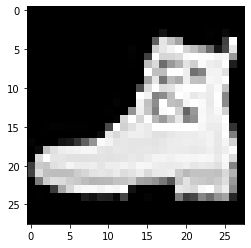

10505 

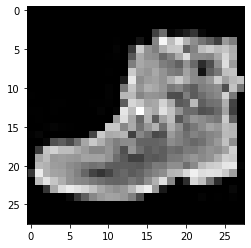

10508 

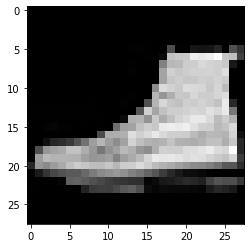

10522 

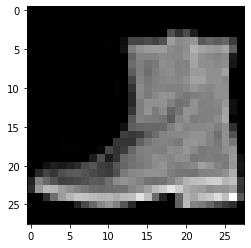

10525 

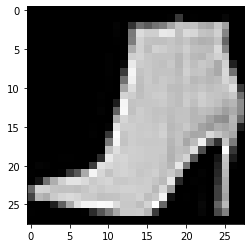

10526 

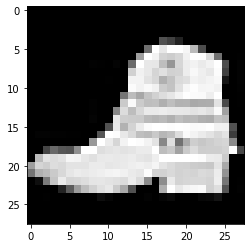

10527 

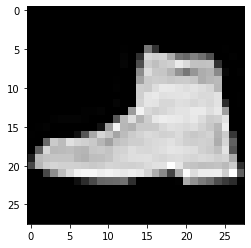

10541 

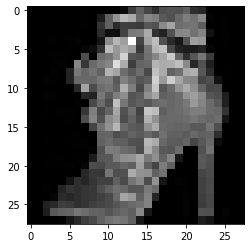

10550 

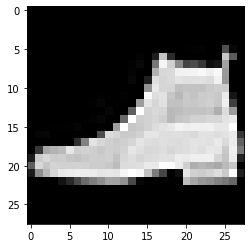

10557 

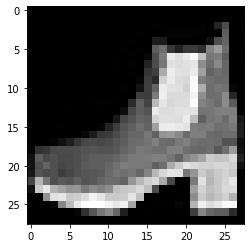

10571 

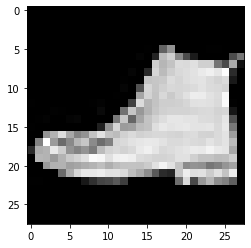

10577 

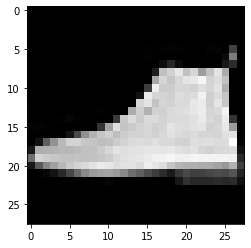

10606 

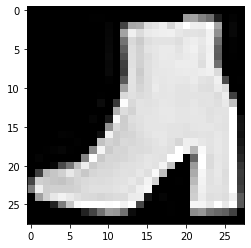

10610 

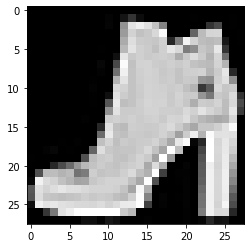

10616 

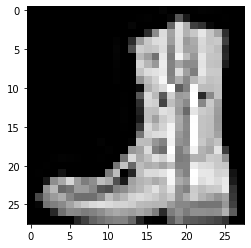

10617 

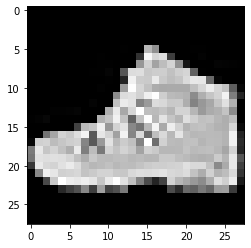

10632 

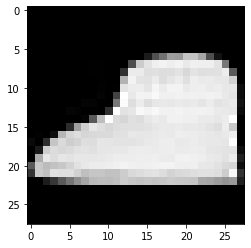

10642 

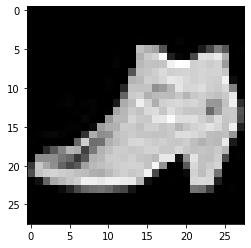

10644 

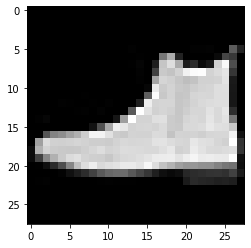

10669 

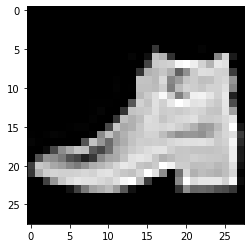

10679 

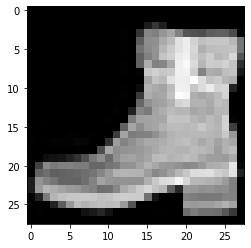

10688 

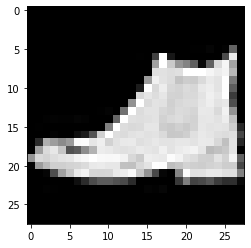

10689 

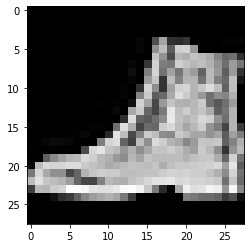

10692 

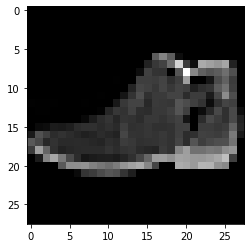

10718 

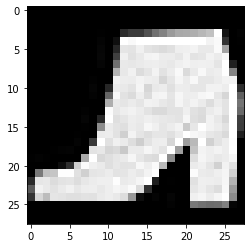

10720 

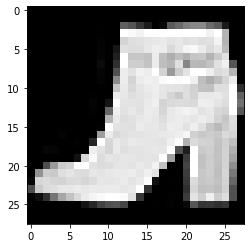

10726 

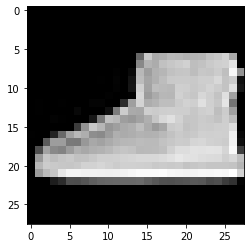

10732 

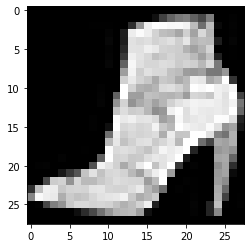

10734 

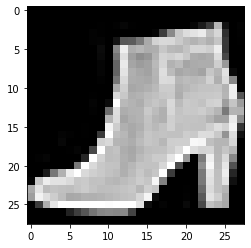

10736 

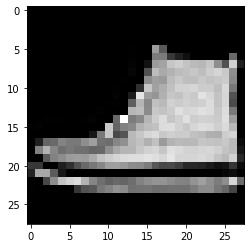

10738 

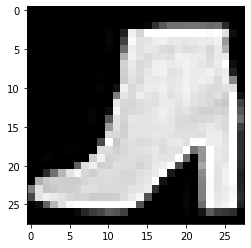

10739 

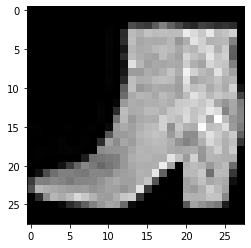

10740 

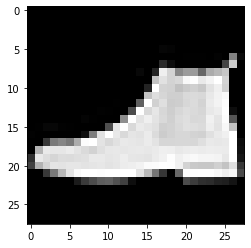

10749 

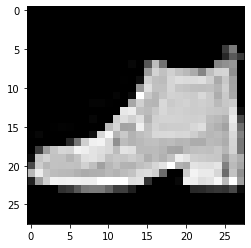

10763 

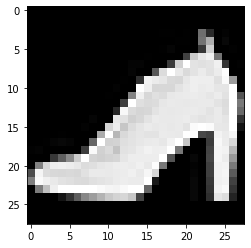

10778 

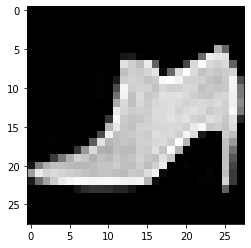

10780 

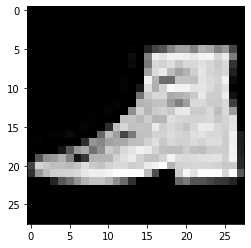

10787 

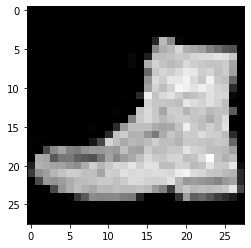

10791 

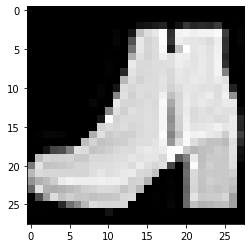

10803 

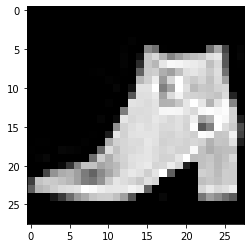

10821 

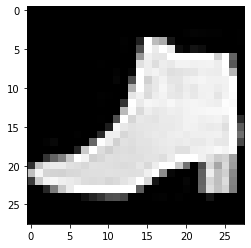

10824 

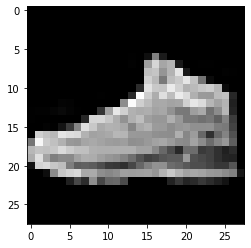

In [70]:
i = 10000
j = 0
while j < 100 :
  if trainy[i] == 9:
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    print (i,end =" ")
    plt.show()
    j += 1
  i += 1


In [4]:
g1 = [10027,	10079,	10075,	10159,	10193,	10363,	10368,	10292,	10314,	10351,	10363,	10396,	10458,	10561,	10574,	10629,	10699,	10844,	10012,	10026,	10063,	10109,	10148,	10185,	10246,	10264,	10311,	10335,	10380,	10386,	10395,	10410,	10501,	10512,	10513,	10530,	10029,	10034,	10035,	10118,	10141,	10211,	10261,	10286,	10347,	10408,	10449,	10450,	10481,	10523,	10570,	10618,	10713,	10762,	10009,	10013,	10018,	10028,	10067,	10089,	10136,	10170,	10186,	10283,	10371,	10403,	10431,	10459,	10483,	10500,	10506,	10534,	10024,	10091,	10115,	10188,	10219,	10236,	10267,	10329,	10358,	10478,	10484,	10515,	10549,	10600,	10774,	10967,	11005,	11042,	10027,	10079,	10075,	10159,	10193,	10363,	10368,	10292,	10314,	10351,	10363,	10396,	10458,	10561,	10574,	10629,	10699,	10844,	10012,	10026,	10063,	10109,	10148,	10185,	10246,	10264,	10311,	10335,	10380,	10386,	10395,	10410,	10501,	10512,	10513,	10530,	10029,	10034,	10035,	10118,	10141,	10211,	10261,	10286,	10347,	10408,	10449,	10450,	10481,	10523,	10570,	10618,	10713,	10762,	10009,	10013,	10018,	10028,	10067,	10089,	10136,	10170,	10186,	10283,	10371,	10403,	10431,	10459,	10483,	10500,	10506,	10534,	10024,	10091,	10115,	10188,	10219,	10236,	10267,	10329,	10358,	10478,	10484,	10515,	10549,	10600,	10774,	10967,	11005,	11042]

g2 = [10010,	10025,	10058,	10073,	10083,	10123,	10128,	10164,	10165,	10278,	10288,	10295,	10350,	10382,	10442,	10469,	10488,	10626,	10047,	10090,	10106,	10131,	10150,	10163,	10166,	10198,	10221,	10276,	10471,	10619,	10621,	10622,	10694,	10751,	10869,	10888,	10005,	10049,	10051,	10102,	10114,	10213,	10232,	10342,	10405,	10441,	10532,	10543,	10572,	10589,	10603,	10657,	10680,	10710,	10060,	10071,	10081,	10095,	10152,	10162,	10174,	10197,	10271,	10362,	10369,	10384,	10476,	10487,	10509,	10658,	10860,	10871,	10040,	10054,	10059,	10130,	10144,	10171,	10182,	10203,	10212,	10254,	10263,	10285,	10313,	10522,	10616,	10679,	10606,	10525,	10010,	10025,	10058,	10073,	10083,	10123,	10128,	10164,	10165,	10278,	10288,	10295,	10350,	10382,	10442,	10469,	10488,	10626,	10047,	10090,	10106,	10131,	10150,	10163,	10166,	10198,	10221,	10276,	10471,	10619,	10621,	10622,	10694,	10751,	10869,	10888,	10005,	10049,	10051,	10102,	10114,	10213,	10232,	10342,	10405,	10441,	10532,	10543,	10572,	10589,	10603,	10657,	10680,	10710,	10060,	10071,	10081,	10095,	10152,	10162,	10174,	10197,	10271,	10362,	10369,	10384,	10476,	10487,	10509,	10658,	10860,	10871,	10040,	10054,	10059,	10130,	10144,	10171,	10182,	10203,	10212,	10254,	10263,	10285,	10313,	10522,	10616,	10679,	10606,	10525]


In [5]:
from numpy.core.multiarray import concatenate
train_per_x_b1 = np.zeros(shape = ( 180, 28, 28 ), dtype=np.uint8)
train_per_y_b1 = np.zeros(shape = ( 180), dtype=np.uint8)
train_per_x_b2 = np.zeros(shape = ( 180, 28, 28 ), dtype=np.uint8)
train_per_y_b2 = np.zeros(shape = ( 180), dtype=np.uint8)
i = 0
for a in g1:
  train_per_x_b1[i] = trainX[a]
  train_per_y_b1[i] = trainy[a]
  i += 1
i = 0
for a in g2:
  train_per_x_b2[i] = trainX[a]
  train_per_y_b2[i] = trainy[a]
  i += 1
train_per_x = np. concatenate((train_per_x_b1, train_per_x_b2), axis=0)
train_per_y = np. concatenate((train_per_y_b1, train_per_y_b2), axis=0)

Dividing the train set to two batches

In [6]:
train_x_b1 = np.zeros(shape = ( 30000, 28, 28 ), dtype=np.uint8)
train_y_b1 = np.zeros(shape = ( 30000 ), dtype=np.uint8)
train_x_b2 = np.zeros(shape = ( 30000, 28, 28 ), dtype=np.uint8)
train_y_b2 = np.zeros(shape = ( 30000 ), dtype=np.uint8)
i=0
j=0
k=0
for i in (range(len(trainy))):
  if (trainy[i] == 0 or trainy[i] == 1 or trainy[i] == 2 or trainy[i] == 3 or trainy[i] == 4) :
    train_x_b1[j] = trainX[i]
    train_y_b1[j] = trainy[i]
    j += 1
  else:
    train_x_b2[k] = trainX[i]
    train_y_b2[k] = trainy[i]
    k += 1

print (len(train_y_b1))
print (len(train_y_b2))

30000
30000


Reshape datasets to prepare for the model

---



In [7]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
train_x_b1 = train_x_b1.reshape((train_x_b1.shape[0], 28, 28, 1))
train_x_b2 = train_x_b2.reshape((train_x_b2.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

train_per_x_b1 = train_per_x_b1.reshape((train_per_x_b1.shape[0], 28, 28, 1))
train_per_x_b2 = train_per_x_b2.reshape((train_per_x_b2.shape[0], 28, 28, 1))
train_per_x = train_per_x.reshape((train_per_x.shape[0], 28, 28, 1))

In [8]:
train_mixX_b3 = np. concatenate((train_per_x,train_x_b1[:21000],train_x_b2), axis=0)
train_mixy_b3 = np. concatenate((train_per_y,train_y_b1[:21000],train_y_b2), axis=0)

Convert the label datasets to categorical since there are 10 possible target categories of digits:

---



In [9]:
# one hot encode target values
trainy = tf.keras.utils.to_categorical(trainy)
train_y_b1 = tf.keras.utils.to_categorical(train_y_b1)
train_y_b2 = tf.keras.utils.to_categorical(train_y_b2)
train_per_y_b1 = tf.keras.utils.to_categorical(train_per_y_b1)
train_per_y_b2 = tf.keras.utils.to_categorical(train_per_y_b2)
testy = tf.keras.utils.to_categorical(testy)

train_per_y = tf.keras.utils.to_categorical(train_per_y)
train_mixy_b3 = tf.keras.utils.to_categorical(train_mixy_b3)

Convert the datasets of images from 8-bit grayscale pixels values to float values and normalize the values to range of 0 and 1:

---



In [10]:
# convert from integers to floats
trainX = trainX.astype('float32')
train_x_b1 = train_x_b1.astype('float32')
train_x_b2 = train_x_b2.astype('float32')
test_X = testX.astype('float32')
train_mixX_b3 = train_mixX_b3.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
train_x_b1 = train_x_b1 / 255.0
train_x_b2 = train_x_b2 / 255.0
testX = testX / 255.0
train_mixX_b3 = train_mixX_b3 / 255.0

# convert from integers to floats
train_per_x = train_per_x.astype('float32')
train_per_x_b1 = train_per_x_b1.astype('float32')
train_per_x_b2 = train_per_x_b2.astype('float32')
# normalize to range 0-1
train_per_x = train_per_x / 255.0
train_per_x_b1 = train_per_x_b1 / 255.0
train_per_x_b2 = train_per_x_b2 / 255.0

Defining the small and final model. Here we are using a dense relu based model with Adam optimizer. We have tried larger networks (e.g., 1200,600,10) but the result did not improve. So we are using a smaller netwrok for less running time.

---



In [11]:
model_small = Sequential()
model_small.add(Flatten())
model_small.add(Dense(300, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model_small.add(Dense(200, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model_small.add(Dense(5, activation='softmax'))
# compile model
opt = Adam(0.01)
model_small.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model_final = Sequential()
model_final.add(Flatten())
model_final.add(Dense(500, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model_final.add(Dense(300, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
model_final.add(Dense(10, activation='softmax'))
# compile model
opt = Adam(0.002)
model_final.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


The function to run the model on given dataset and parameters using k-fold cross-validation:

---



In [12]:
# evaluate a model using k-fold cross-validation
def evaluate_model(model, dataX, dataY, n_folds, n_epochs, n_batch_size):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=n_epochs, batch_size=n_batch_size, validation_data=(testX, testY))
		# evaluate model
		_, acc = model.evaluate(testX, testY)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories, model

In [13]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
      # plot loss
      plt.subplot(2, 2, 1)
      plt.title('Cross Entropy Loss')
      plt.plot(histories[i].history['loss'], color='blue', label='train')
      plt.plot(histories[i].history['val_loss'], color='orange', label='test')
      # plot accuracy
      plt.subplot(2, 2, 2)
      plt.title('Classification Accuracy')
      plt.plot(histories[i].history['accuracy'], color='blue', label='train')
      plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

Creating the base random intitialized model and save it to reuse for the baseline. We want to use same random weights for comparing different methods fairly:

---



In [14]:
model_small.build((None, 28, 28, 1))
model_small.save("random_init_small")
model_final.build((None, 28, 28, 1))
model_final.save("random_init_final")

INFO:tensorflow:Assets written to: random_init_small/assets
INFO:tensorflow:Assets written to: random_init_final/assets


Creating a list to save each run performance 

---



In [15]:
results = ([])

In [16]:
model_small.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 296,705
Trainable params: 296,705
Non-trainable params: 0
_________________________________________________________________


Epoch 1/6
375/375 [==============================] - 4s 10ms/step - loss: 0.7086 - accuracy: 0.7743 - val_loss: 0.4839 - val_accuracy: 0.8367
Epoch 2/6
375/375 [==============================] - 4s 9ms/step - loss: 0.4337 - accuracy: 0.8516 - val_loss: 0.4462 - val_accuracy: 0.8438
Epoch 3/6
375/375 [==============================] - 3s 9ms/step - loss: 0.3916 - accuracy: 0.8635 - val_loss: 0.4229 - val_accuracy: 0.8562
Epoch 4/6
375/375 [==============================] - 3s 9ms/step - loss: 0.3654 - accuracy: 0.8719 - val_loss: 0.3775 - val_accuracy: 0.8668
Epoch 5/6
375/375 [==============================] - 3s 9ms/step - loss: 0.3427 - accuracy: 0.8792 - val_loss: 0.3642 - val_accuracy: 0.8722
Epoch 6/6
188/188 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8753
> 87.533
Epoch 1/6
375/375 [==============================] - 4s 10ms/step - loss: 0.3211 - accuracy: 0.8853 - val_loss: 0.2975 - val_accuracy: 0.8932
Epoch 2/6
375/375 [=========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


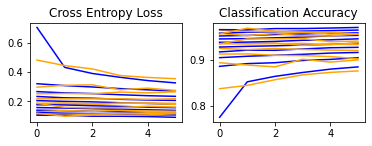

Accuracy: mean=92.730 std=2.622, n=10


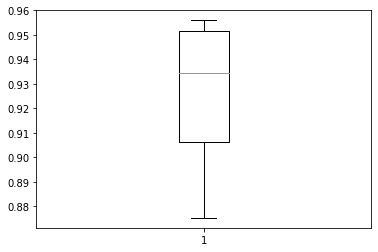

['Random initialized on F-MNIST with LR=0.0001 & epoch=6', 96.667, 96.792, 88.82]


In [60]:
model = tf.keras.models.load_model("random_init_final")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
scores, histories, model = evaluate_model(model, trainX, trainy,10,6,144)



# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "Random initialized on F-MNIST with LR=0.0001 & epoch=6"
results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
print (results[len(results)-1])

Epoch 1/7
375/375 [==============================] - 4s 10ms/step - loss: 0.7086 - accuracy: 0.7743 - val_loss: 0.4839 - val_accuracy: 0.8367
Epoch 2/7
375/375 [==============================] - 5s 13ms/step - loss: 0.4337 - accuracy: 0.8516 - val_loss: 0.4462 - val_accuracy: 0.8438
Epoch 3/7
375/375 [==============================] - 3s 9ms/step - loss: 0.3916 - accuracy: 0.8635 - val_loss: 0.4229 - val_accuracy: 0.8562
Epoch 4/7
375/375 [==============================] - 4s 10ms/step - loss: 0.3654 - accuracy: 0.8719 - val_loss: 0.3775 - val_accuracy: 0.8668
Epoch 5/7
375/375 [==============================] - 4s 9ms/step - loss: 0.3427 - accuracy: 0.8792 - val_loss: 0.3642 - val_accuracy: 0.8722
Epoch 6/7
375/375 [==============================] - 4s 9ms/step - loss: 0.3269 - accuracy: 0.8841 - val_loss: 0.3557 - val_accuracy: 0.8753
Epoch 7/7
188/188 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8735
> 87.350
Epoch 1/7
375/375 [========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


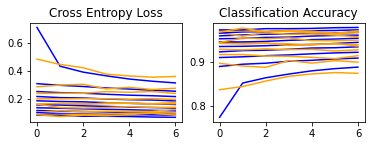

Accuracy: mean=93.250 std=2.880, n=10


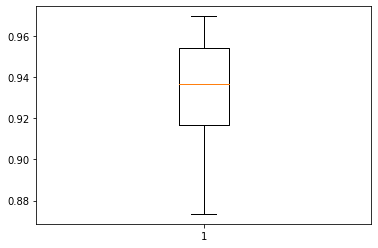

['Random initialized on F-MNIST with LR=0.0001 & epoch=7', 98.889, 97.858, 89.24]


In [61]:
model = tf.keras.models.load_model("random_init_final")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
scores, histories, model = evaluate_model(model, trainX, trainy,10,7,144)



# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "Random initialized on F-MNIST with LR=0.0001 & epoch=7"
results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
print (results[len(results)-1])

Epoch 1/8
375/375 [==============================] - 4s 10ms/step - loss: 0.7086 - accuracy: 0.7743 - val_loss: 0.4839 - val_accuracy: 0.8367
Epoch 2/8
375/375 [==============================] - 4s 10ms/step - loss: 0.4337 - accuracy: 0.8516 - val_loss: 0.4462 - val_accuracy: 0.8438
Epoch 3/8
375/375 [==============================] - 4s 10ms/step - loss: 0.3916 - accuracy: 0.8635 - val_loss: 0.4229 - val_accuracy: 0.8562
Epoch 4/8
375/375 [==============================] - 4s 10ms/step - loss: 0.3654 - accuracy: 0.8719 - val_loss: 0.3775 - val_accuracy: 0.8668
Epoch 5/8
375/375 [==============================] - 4s 10ms/step - loss: 0.3427 - accuracy: 0.8792 - val_loss: 0.3642 - val_accuracy: 0.8722
Epoch 6/8
375/375 [==============================] - 4s 10ms/step - loss: 0.3269 - accuracy: 0.8841 - val_loss: 0.3557 - val_accuracy: 0.8753
Epoch 7/8
375/375 [==============================] - 4s 9ms/step - loss: 0.3151 - accuracy: 0.8876 - val_loss: 0.3610 - val_accuracy: 0.8735
Epoch 8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


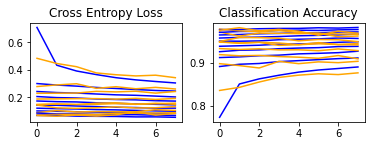

Accuracy: mean=93.583 std=2.877, n=10


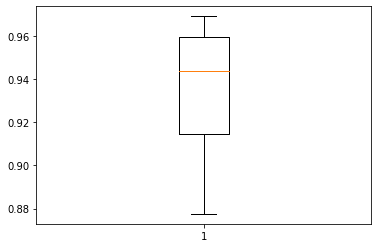

['Random initialized on F-MNIST with LR=0.0001 & epoch=8', 98.889, 97.932, 89.05]


In [62]:
model = tf.keras.models.load_model("random_init_final")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
scores, histories, model = evaluate_model(model, trainX, trainy,10,8,144)



# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "Random initialized on F-MNIST with LR=0.0001 & epoch=8"
results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
print (results[len(results)-1])

EXPANSE:

Epoch 1/12
2/2 [==============================] - 1s 144ms/step - loss: 1.6039 - accuracy: 0.3519 - val_loss: 1.3916 - val_accuracy: 0.3889
Epoch 2/12
2/2 [==============================] - 0s 25ms/step - loss: 1.0290 - accuracy: 0.7346 - val_loss: 0.8757 - val_accuracy: 0.8333
Epoch 3/12
2/2 [==============================] - 0s 25ms/step - loss: 0.6758 - accuracy: 0.8951 - val_loss: 0.4878 - val_accuracy: 1.0000
Epoch 4/12
2/2 [==============================] - 0s 24ms/step - loss: 0.4214 - accuracy: 0.9383 - val_loss: 0.3689 - val_accuracy: 1.0000
Epoch 5/12
2/2 [==============================] - 0s 25ms/step - loss: 0.2898 - accuracy: 0.9444 - val_loss: 0.2422 - val_accuracy: 1.0000
Epoch 6/12
2/2 [==============================] - 0s 30ms/step - loss: 0.1940 - accuracy: 0.9568 - val_loss: 0.1352 - val_accuracy: 1.0000
Epoch 7/12
2/2 [==============================] - 0s 24ms/step - loss: 0.1490 - accuracy: 0.9383 - val_loss: 0.1164 - val_accuracy: 1.0000
Epoch 8/12
2/2 [==========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


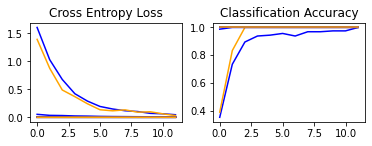

Accuracy: mean=100.000 std=0.000, n=10


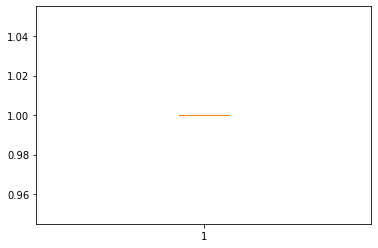

['Random initialized on per_b1 (0 to 4) with LR=0.001 & epoch=12', 100.0, 80.177]


In [26]:
model = tf.keras.models.load_model("random_init_small")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)
scores, histories, model = evaluate_model(model, train_per_x_b1, train_per_y_b1,10,12,81)

model.save("trained_perfect_b1")

# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "Random initialized on per_b1 (categories of 0 to 4) with LR=0.001 & epoch=12"
results.append([desc,round(model.evaluate(train_per_x_b1, train_per_y_b1, verbose=0)[1]*100,3),round(model.evaluate(train_x_b1, train_y_b1, verbose=0)[1]*100,3)])
print (results[len(results)-1])

In [28]:
trainmixX_b1 = np. concatenate((train_x_b1, train_per_x_b1), axis=0)
trainmixy_b1 = np. concatenate((train_y_b1, train_per_y_b1), axis=0)
print(trainmixX_b1.shape)
print(trainmixy_b1.shape)


(30180, 28, 28, 1)
(30180, 5)


Epoch 1/8
336/336 [==============================] - 2s 5ms/step - loss: 0.4019 - accuracy: 0.8591 - val_loss: 0.3603 - val_accuracy: 0.8731
Epoch 2/8
336/336 [==============================] - 2s 5ms/step - loss: 0.3049 - accuracy: 0.8898 - val_loss: 0.3032 - val_accuracy: 0.8953
Epoch 3/8
336/336 [==============================] - 2s 5ms/step - loss: 0.2750 - accuracy: 0.9020 - val_loss: 0.3108 - val_accuracy: 0.8897
Epoch 4/8
336/336 [==============================] - 2s 5ms/step - loss: 0.2522 - accuracy: 0.9087 - val_loss: 0.2709 - val_accuracy: 0.9032
Epoch 5/8
336/336 [==============================] - 2s 5ms/step - loss: 0.2355 - accuracy: 0.9138 - val_loss: 0.2648 - val_accuracy: 0.9049
Epoch 6/8
336/336 [==============================] - 2s 5ms/step - loss: 0.2249 - accuracy: 0.9183 - val_loss: 0.2578 - val_accuracy: 0.9085
Epoch 7/8
336/336 [==============================] - 2s 5ms/step - loss: 0.2107 - accuracy: 0.9224 - val_loss: 0.2774 - val_accuracy: 0.9036
Epoch 8/8
95/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


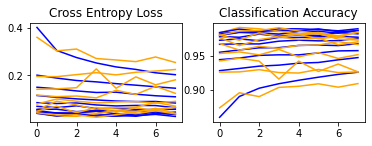

Accuracy: mean=95.663 std=2.571, n=10


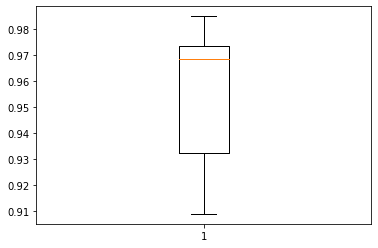

['trained_finetune_mix_b1 on mix data (categories of 0 to 4) with LR=0.0005 & epoch=8', 100.0, 98.95]


In [39]:
model = tf.keras.models.load_model("trained_perfect_b1")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0005)
scores, histories, model = evaluate_model(model, trainmixX_b1, trainmixy_b1,10,8,81)

model.save("trained_finetune_mix_b1")

# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "trained_finetune_mix_b1 on mix data (categories of 0 to 4) with LR=0.0005 & epoch=8"
results.append([desc,round(model.evaluate(train_per_x_b1, train_per_y_b1, verbose=0)[1]*100,3),round(model.evaluate(train_x_b1, train_y_b1, verbose=0)[1]*100,3)])
print (results[len(results)-1])

Updating random final model with weights from finetuned small size model.

In [40]:
model_small = tf.keras.models.load_model("trained_finetune_mix_b1")
model_final = tf.keras.models.load_model("random_init_final")
b = model_small.layers[1].get_weights()
a = model_final.layers[1].get_weights()
a[0][:784,:300]=b[0]
a[1][:300]=b[1]
model_final.layers[1].set_weights(a)

b = model_small.layers[2].get_weights()
a = model_final.layers[2].get_weights()
a[0][:300,:200]=b[0]
a[1][:200]=b[1]
model_final.layers[2].set_weights(a)

b = model_small.layers[3].get_weights()
a = model_final.layers[3].get_weights()
a[0][:200,:5]=b[0]
a[1][:5]=b[1]
model_final.layers[3].set_weights(a)

In [41]:
model = model_final
model.layers[3].weights

[<tf.Variable 'dense_5/kernel:0' shape=(300, 10) dtype=float32, numpy=
 array([[-0.01945569, -0.17973632, -0.5293795 , ..., -0.04618773,
         -0.12922554,  0.13178085],
        [ 0.22279264, -0.11698546, -0.23480578, ...,  0.04397899,
          0.10153401, -0.12047584],
        [-0.08965144,  0.16599792,  0.00441201, ...,  0.12067883,
         -0.12364914, -0.01514611],
        ...,
        [ 0.02074444, -0.06549399,  0.09755109, ...,  0.09745234,
         -0.09730152,  0.09756203],
        [-0.02081618,  0.04266517,  0.04235858, ..., -0.08235405,
          0.00250287,  0.00477713],
        [-0.02665937, -0.01693602, -0.02524523, ..., -0.08103518,
         -0.02715031,  0.06878036]], dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.12269924, -0.17886412,  0.03549136,  0.0956614 , -0.00398134,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       dtype=float32)>]

In [42]:
model_final.save('final_model_loaded_weights')
desc = "final_model_loaded_weights without training"
results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
print (results[len(results)-1])

INFO:tensorflow:Assets written to: final_model_loaded_weights/assets
['final_model_loaded_weights without training', 50.0, 49.518, 46.0]


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               392500    
                                                                 
 dense_4 (Dense)             (None, 300)               150300    
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 545,810
Trainable params: 545,810
Non-trainable params: 0
_________________________________________________________________


In [26]:
#model = tf.keras.models.load_model("final_model_loaded_weights")
#from keras import backend as K
#K.set_value(model.optimizer.learning_rate, 0.001)
#scores, histories, model = evaluate_model(model, train_per_x, train_per_y,10,8,144)

#model.save("trained_perfectdata")

# learning curves
#summarize_diagnostics(histories)
# summarize estimated performance
#summarize_performance(scores)
#desc = "final_model_loaded_weights on perfect data with LR=0.001 & epoch=8"
#results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
#print (results[len(results)-1])

Because we were not able to freez the small part of the model, applying the two-steps training in this state means catastrophic forgetting. Therefore, we are not using the above training step in our training process.

Epoch 1/6
321/321 [==============================] - 3s 10ms/step - loss: 0.9224 - accuracy: 0.7706 - val_loss: 0.3983 - val_accuracy: 0.8676
Epoch 2/6
321/321 [==============================] - 3s 9ms/step - loss: 0.3355 - accuracy: 0.8837 - val_loss: 0.3025 - val_accuracy: 0.8939
Epoch 3/6
321/321 [==============================] - 3s 9ms/step - loss: 0.2766 - accuracy: 0.9005 - val_loss: 0.2717 - val_accuracy: 0.9007
Epoch 4/6
321/321 [==============================] - 3s 9ms/step - loss: 0.2442 - accuracy: 0.9111 - val_loss: 0.2507 - val_accuracy: 0.9099
Epoch 5/6
321/321 [==============================] - 3s 9ms/step - loss: 0.2236 - accuracy: 0.9172 - val_loss: 0.2381 - val_accuracy: 0.9151
Epoch 6/6
161/161 [==============================] - 0s 2ms/step - loss: 0.2314 - accuracy: 0.9171
> 91.706
Epoch 1/6
321/321 [==============================] - 3s 9ms/step - loss: 0.2001 - accuracy: 0.9256 - val_loss: 0.1966 - val_accuracy: 0.9231
Epoch 2/6
321/321 [==========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


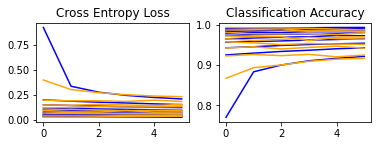

Accuracy: mean=96.069 std=2.418, n=10


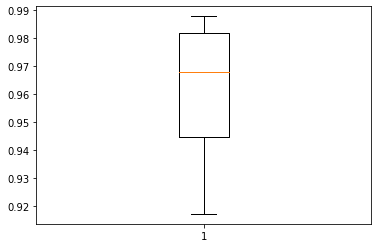

['final_model_loaded_weights on mix data with LR=0.0001 & epoch=6', 100.0, 98.427, 89.42]


In [53]:
model = tf.keras.models.load_model("final_model_loaded_weights")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
scores, histories, model = evaluate_model(model, train_mixX_b3, train_mixy_b3,10,6,144)



# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "final_model_loaded_weights on mix data with LR=0.0001 & epoch=6"
results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
print (results[len(results)-1])

Epoch 1/7
321/321 [==============================] - 4s 12ms/step - loss: 0.9224 - accuracy: 0.7706 - val_loss: 0.3983 - val_accuracy: 0.8676
Epoch 2/7
321/321 [==============================] - 4s 12ms/step - loss: 0.3355 - accuracy: 0.8837 - val_loss: 0.3025 - val_accuracy: 0.8939
Epoch 3/7
321/321 [==============================] - 3s 10ms/step - loss: 0.2766 - accuracy: 0.9005 - val_loss: 0.2717 - val_accuracy: 0.9007
Epoch 4/7
321/321 [==============================] - 3s 10ms/step - loss: 0.2442 - accuracy: 0.9111 - val_loss: 0.2507 - val_accuracy: 0.9099
Epoch 5/7
321/321 [==============================] - 4s 12ms/step - loss: 0.2236 - accuracy: 0.9172 - val_loss: 0.2381 - val_accuracy: 0.9151
Epoch 6/7
321/321 [==============================] - 4s 13ms/step - loss: 0.2086 - accuracy: 0.9221 - val_loss: 0.2314 - val_accuracy: 0.9171
Epoch 7/7
161/161 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9178
> 91.783
Epoch 1/7
321/321 [=====================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


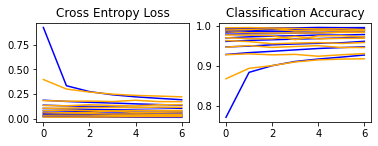

Accuracy: mean=96.501 std=2.469, n=10


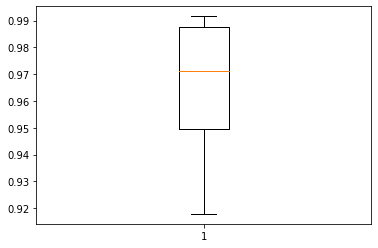

['final_model_loaded_weights on mix data with LR=0.0001 & epoch=7', 100.0, 98.727, 89.43]


In [52]:
model = tf.keras.models.load_model("final_model_loaded_weights")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
scores, histories, model = evaluate_model(model, train_mixX_b3, train_mixy_b3,10,7,144)



# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "final_model_loaded_weights on mix data with LR=0.0001 & epoch=7"
results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
print (results[len(results)-1])

Epoch 1/8
321/321 [==============================] - 3s 10ms/step - loss: 0.9224 - accuracy: 0.7706 - val_loss: 0.3983 - val_accuracy: 0.8676
Epoch 2/8
321/321 [==============================] - 3s 9ms/step - loss: 0.3355 - accuracy: 0.8837 - val_loss: 0.3025 - val_accuracy: 0.8939
Epoch 3/8
321/321 [==============================] - 3s 9ms/step - loss: 0.2766 - accuracy: 0.9005 - val_loss: 0.2717 - val_accuracy: 0.9007
Epoch 4/8
321/321 [==============================] - 3s 9ms/step - loss: 0.2442 - accuracy: 0.9111 - val_loss: 0.2507 - val_accuracy: 0.9099
Epoch 5/8
321/321 [==============================] - 3s 9ms/step - loss: 0.2236 - accuracy: 0.9172 - val_loss: 0.2381 - val_accuracy: 0.9151
Epoch 6/8
321/321 [==============================] - 3s 9ms/step - loss: 0.2086 - accuracy: 0.9221 - val_loss: 0.2314 - val_accuracy: 0.9171
Epoch 7/8
321/321 [==============================] - 3s 9ms/step - loss: 0.1946 - accuracy: 0.9273 - val_loss: 0.2237 - val_accuracy: 0.9178
Epoch 8/8
16

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


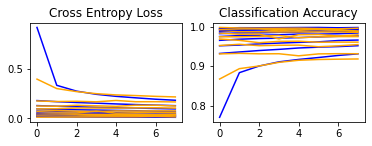

Accuracy: mean=96.799 std=2.480, n=10


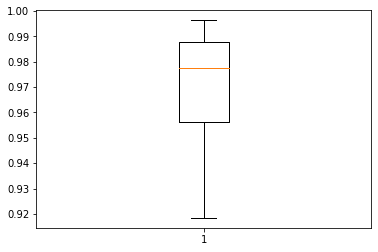

['final_model_loaded_weights on mix data with LR=0.0001 & epoch=8', 100.0, 98.687, 89.34]


In [50]:
model = tf.keras.models.load_model("final_model_loaded_weights")
from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)
scores, histories, model = evaluate_model(model, train_mixX_b3, train_mixy_b3,10,8,144)



# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)
desc = "final_model_loaded_weights on mix data with LR=0.0001 & epoch=8"
results.append([desc,round(model.evaluate(train_per_x, train_per_y, verbose=0)[1]*100,3),round(model.evaluate(trainX, trainy, verbose=0)[1]*100,3),round(model.evaluate(testX, testy, verbose=0)[1]*100,3)])
print (results[len(results)-1])

In [ ]:
results

In [ ]:
import pandas
df=pandas.DataFrame(results,list(range(1, len(results)+1)),["Description","Train perfect", "Train MNIST", "Test MNIST"])
df

In [65]:
df.to_csv('results.csv', sep=',', encoding='utf-8')

In [31]:
#!zip -r /content/EXPANSE_Model_Expansion_colab.zip /content

In [66]:
files.download('results.csv') 
#files.download('EXPANSE_Model_Expansion_colab.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
import platform,socket,re,uuid,json,psutil,logging

def getSystemInfo():
    try:
        info={}
        info['platform']=platform.system()
        info['platform-release']=platform.release()
        info['platform-version']=platform.version()
        info['architecture']=platform.machine()
        info['hostname']=socket.gethostname()
        info['ip-address']=socket.gethostbyname(socket.gethostname())
        info['mac-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
        info['processor']=platform.processor()
        info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())

{'architecture': 'x86_64',
 'hostname': 'f0d2e99f4d9a',
 'ip-address': '172.28.0.2',
 'mac-address': '02:42:ac:1c:00:02',
 'platform': 'Linux',
 'platform-release': '5.4.188+',
 'platform-version': '#1 SMP Sun Apr 24 10:03:06 PDT 2022',
 'processor': 'x86_64',
 'ram': '13 GB'}